In [1]:
import numpy as np
from numpy.typing import NDArray


In [36]:

class Spectrum:
    def __init__(self, spectrum: NDArray) -> None:
        self.spec1d: NDArray = spectrum
        self.peaks_x: NDArray = None
        self.peaks_y: NDArray = None
        self.valley_x: NDArray = None
        self.valley_y: NDArray = None
        self.set_peaks(0, 100)
    
    def set_peaks(self, baseline: float, resolution: int = 20):
        peaks = []
        valleys = []
        pintensities = []
        vintensities = []
        for i in range(resolution, len(self.spec1d)-resolution, resolution*2):
            # find left bound x and y | find right bound x and y
            lb , rb = i - resolution, i + resolution
            lbv, rbv = self.spec1d[lb], self.spec1d[rb]
            # find max between x bounds
            ymax, ymin = self.spec1d[lb:rb].max(), self.spec1d[lb:rb].min()
            xmax, xmin = self.spec1d[lb:rb].argmax()+lb, self.spec1d[lb:rb].argmin()+lb
            # if max > ly and ry add to peaks
            if (lbv < ymax > rbv) and (xmax != lb and xmax != rb):
                print(i, "max", "values", lbv, ymax, rbv, "ranges", lb, xmax, rb)
                peaks.append(xmax)
                pintensities.append(ymax)
            if (lbv > ymin < rbv) and (xmin != lb and xmin != rb):
                print(i, "min", "values", lbv, ymin, rbv, "ranges", lb, xmin, rb)
                valleys.append(xmin)
                vintensities.append(ymin)
        self.peaks_x = np.array(peaks)
        self.peaks_y = np.array(pintensities)
        self.valley_x = np.array(valleys)
        self.valley_y = np.array(vintensities)
            

In [37]:
data = np.loadtxt("baseline_subtracted.txt")
spec = Spectrum(data)


100 max values 7243.076364588008 9428.02622635934 4223.130479723517 ranges 0 157 200
100 min values 7243.076364588008 4174.680702681918 4223.130479723517 ranges 0 199 200
300 max values 4223.130479723517 9247.5185816944 7782.459444444445 ranges 200 241 400
500 max values 7782.459444444445 7826.124083082675 5436.897555379049 ranges 400 404 600
500 min values 7782.459444444445 5418.611383297034 5436.897555379049 ranges 400 599 600
900 max values 3887.638224025568 3901.1537341042704 2804.5183420055323 ranges 800 803 1000
1100 max values 2804.5183420055323 2813.512137273143 2064.202735841204 ranges 1000 1003 1200
1300 max values 2064.202735841204 2078.899517236947 1646.01315894288 ranges 1200 1201 1400
1300 min values 2064.202735841204 1604.1821776021386 1646.01315894288 ranges 1200 1359 1400
1500 min values 1646.01315894288 769.5798283428217 825.2657373628499 ranges 1400 1597 1600
1700 max values 825.2657373628499 1310.9260787046053 1116.6044540687187 ranges 1600 1643 1800
1900 min values

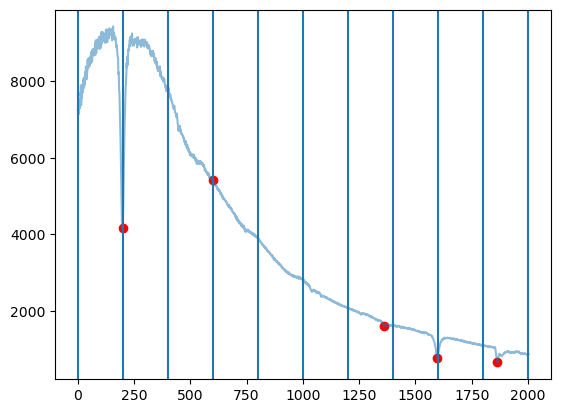

In [38]:
from matplotlib.pyplot import subplots, show, close

fig, ax = subplots()
for i in range(0, data.size, 100*2):
    ax.axvline([i])
ax.plot(spec.spec1d, alpha=0.5)
ax.scatter(spec.valley_x, spec.valley_y, c="r")
show()
close(fig)